In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras import Sequential


In [116]:
from math import tanh, sqrt
import matplotlib.pyplot as plt
import os

In [216]:
# Functions:

def targetValueFunction(inpAttr):
#     inpAttr shape = (samples, numberOfAttributes)
    bias = np.random.random_sample(inpAttr.shape[1])
    bias = (0.6-0.2)*bias + 0.2
#     Setting range of random bias as 0.2 to 0.6
#     Will add the same bias to all samples
#     print(bias)
    target = calculate(inpAttr, bias)
#     print(target)
    return target

def calculate(inpAttr, bias):
    inpAttr = inpAttr*inpAttr
    for i in range(inpAttr.shape[0]):
        for j in range(inpAttr.shape[1]):
            inpAttr[i][j] = tanh(inpAttr[i][j])
    for i in range(inpAttr.shape[0]):
        inpAttr[i] += bias
    for i in range(inpAttr.shape[0]):
        for j in range(inpAttr.shape[1]):
            inpAttr[i][j] = sqrt(inpAttr[i][j])
#     returns values = sum(root(tanh(x^2) + bias))
    target = np.sum(inpAttr, axis = 1)
    return target


In [ ]:
# Sorted Scenes till here

In [5]:
trial = []
trial.append([1,2,3,4])
trial.append([3,1,3,5])
trial.append([1,-2,0.3,2.5])
trial = np.asarray(trial)
print(trial)
trial = trial/10
print(trial)

[[ 1.   2.   3.   4. ]
 [ 3.   1.   3.   5. ]
 [ 1.  -2.   0.3  2.5]]
[[ 0.1   0.2   0.3   0.4 ]
 [ 0.3   0.1   0.3   0.5 ]
 [ 0.1  -0.2   0.03  0.25]]


In [7]:
print(trial.shape)

(3, 4)


In [18]:
t = targetValueFunction(trial)

[0.46395776 0.51511021 0.44662893 0.29777855]
[2.84146665 2.93782943 2.70262896]


In [ ]:
# Some adjustable parameters (hyper parameters in our case)

In [23]:
numSamples = 5000
numAttributes = 10
inpX = np.random.random_sample((numSamples,numAttributes))

In [24]:
targets = targetValueFunction(inpX)

[0.57697825 0.28405326 0.38593481 0.30144476 0.32608157 0.54723307
 0.31920214 0.59998487 0.44014847 0.26628209]
[8.65423459 7.67227654 8.07788924 ... 8.44071966 7.9705275  7.99895843]


In [25]:
targets.shape

(5000,)

In [ ]:
# Sorted Scenes Till Here

In [138]:
# Neural Network which must not be named..... jk, who's working has to be optimised
def createExpModel():
    experimentalModel = Sequential()
    experimentalModel.add(Dense(2*numAttributes, input_shape = (numAttributes,), activation = tf.keras.activations.tanh))
    experimentalModel.add(Dense(numAttributes))
    experimentalModel.add(Dense(1))
    experimentalModel.summary()
    return experimentalModel

experimentalModel = createExpModel()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_29 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 11        
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________


In [48]:
experimentalModel.get_weights()

[array([[-4.41952437e-01, -7.33818412e-02, -3.14637482e-01,
          5.53310513e-02, -4.18022811e-01, -1.90915108e-01,
         -3.05856138e-01,  3.09388936e-02, -8.94533098e-02,
          3.42982709e-01, -3.83515656e-01,  1.49180770e-01,
          2.17243791e-01, -8.14713240e-02,  3.44002306e-01,
          6.05411530e-02,  1.55828238e-01, -2.54371673e-01,
          2.65295923e-01,  1.85187995e-01],
        [ 1.35936975e-01,  3.86213243e-01,  1.82135940e-01,
         -5.05651534e-02,  2.75159836e-01, -1.28419697e-01,
          1.34563029e-01, -1.58654630e-01,  2.27411568e-01,
          4.21547472e-01,  3.10782194e-01,  2.55616903e-01,
         -1.68890744e-01, -3.28693956e-01, -2.06438303e-01,
         -4.92475033e-02,  2.53513038e-01,  7.32231140e-02,
         -4.45730448e-01, -3.82660210e-01],
        [-1.03312194e-01, -3.10419559e-01,  2.78096676e-01,
          3.96991313e-01, -4.07538414e-02,  2.18303084e-01,
         -2.04596266e-01, -2.63955653e-01, -3.02985728e-01,
         -4.

In [49]:
experimentalModel.compile(optimizer = 'adam', loss= 'mse', metrics = ['accuracy'])

In [50]:
# Training
trackingArray = []
batch_size = 20
epochs = 5
for epoch in range(epochs):
    for i in range(0,numSamples,15):
        experimentalModel.fit(np.asarray(inpX[i:i+batch_size]),np.asarray(targets[i:i+batch_size]))
        trackingArray.append(np.array(experimentalModel.get_weights()))
print(len(trackingArray))

1/1 [==============================] - 0s 1ms/step - loss: 4.9487 - accuracy: 0.0000e+00


1/1 [==============================] - 0s 917us/step - loss: 0.4901 - accuracy: 0.0000e+00


1/1 [==============================] - 0s 902us/step - loss: 0.3012 - accuracy: 0.0000e+00


1/1 [==============================] - 0s 1ms/step - loss: 0.1998 - accuracy: 0.0000e+00


1/1 [==============================] - 0s 949us/step - loss: 0.1627 - accuracy: 0.0000e+00


1/1 [==============================] - 0s 1ms/step - loss: 0.1498 - accuracy: 0.0000e+00


1/1 [==============================] - 0s 1ms/step - loss: 0.1734 - accuracy: 0.0000e+00


1/1 [==============================] - 0s 1ms/step - loss: 0.0672 - accuracy: 0.0000e+00


1/1 [==============================] - 0s 2ms/step - loss: 0.0843 - accuracy: 0.0000e+00


1/1 [==============================] - 0s 1ms/step - loss: 0.0833 - accuracy: 0.0000e+00


1/1 [==============================] - 0s 868us/step - loss: 0.1200 - accuracy: 0.0000e+00


1/1 [==============================] - 0s 1ms/step - loss: 0.0630 - accuracy: 0.0000e+00


1/1 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.0000e+00


1/1 [==============================] - 0s 1ms/step - loss: 0.0376 - accuracy: 0.0000e+00


1/1 [==============================] - 0s 1ms/step - loss: 0.0170 - accuracy: 0.0000e+00


1/1 [==============================] - 0s 1ms/step - loss: 0.0355 - accuracy: 0.0000e+00


1/1 [==============================] - 0s 849us/step - loss: 0.0364 - accuracy: 0.0000e+00


1/1 [==============================] - 0s 987us/step - loss: 0.0291 - accuracy: 0.0000e+00


1/1 [==============================] - 0s 1ms/step - loss: 0.0329 - accuracy: 0.0000e+00
1670


In [45]:
# Gonna have to figure this part out eh ehe ehehehehe

# # list all data in history
# print(history.history.keys())
# # summarize history for accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# # summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [51]:
trackingArray = np.asarray(trackingArray)
trackingArray.shape

(1670, 6)

In [52]:
for i in range(6):
    print(np.asarray(trackingArray[0][i]).shape)

(10, 20)
(20,)
(20, 10)
(10,)
(10, 1)
(1,)


In [53]:
layer1 = []
layer2 = []
for i in range(10*20):
    layer1.append([])
    layer2.append([])
bias1 = []
bias2 = []
layer3 = []
for i in range(10):
    layer3.append([])
    bias1.append([])
    bias1.append([])
    bias2.append([])
bias3 = []
for i in range(trackingArray.shape[0]):
    for k in range(200):
        layer1[k].append(trackingArray[i][0][int(k//20)][int(k%20)])
        layer2[k].append(trackingArray[i][2][int(k//10)][int(k%10)])
    for k in range(10):
        layer3[k].append(trackingArray[i][4][k][0])
        bias2[k].append(trackingArray[i][3][k])
        bias1[2*k].append(trackingArray[i][1][2*k])
        bias1[2*k+1].append(trackingArray[i][1][2*k+1])
    bias3.append(trackingArray[i][5])



In [54]:
layer1 = np.asarray(layer1)
layer2 = np.asarray(layer2)
layer3 = np.asarray(layer3)
bias1 = np.asarray(bias1)
bias2 = np.asarray(bias2)
bias3 = np.asarray(bias3)

print(layer1.shape)
print(layer2.shape)
print(layer3.shape)
print(bias1.shape)
print(bias2.shape)
print(bias3.shape)


(200, 1670)
(200, 1670)
(10, 1670)
(20, 1670)
(10, 1670)
(1670, 1)


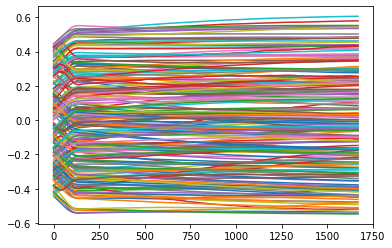

In [55]:
for i in range(200):
    plt.plot(layer1[i])

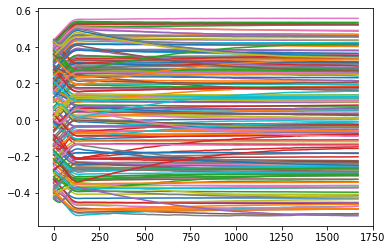

In [56]:
for i in range(200):
    plt.plot(layer2[i])

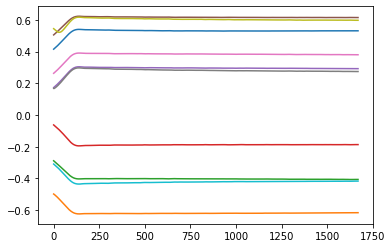

In [57]:
for i in range(10):
    plt.plot(layer3[i])

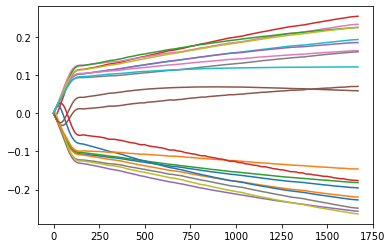

In [58]:
for i in range(20):
    plt.plot(bias1[i])

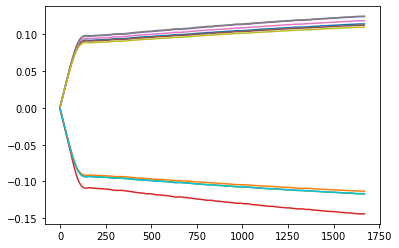

In [59]:
for i in range(10):
    plt.plot(bias2[i])

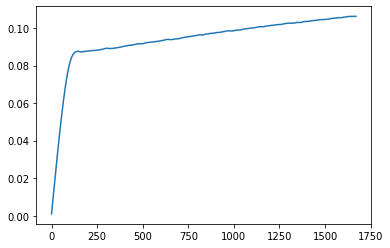

In [60]:
plt.plot(bias3)

In [62]:
bias3 = np.reshape(bias3, (bias3.shape[0]))
bias3.shape

(1670,)

In [70]:
allLists = []
for i in range(200):
    allLists.append(layer1[i])
for i in range(200):
    allLists.append(layer2[i])
for i in range(10):
    allLists.append(layer3[i])
for i in range(20):
    allLists.append(bias1[i])
for i in range(10):
    allLists.append(bias2[i])
allLists.append(bias3)

In [71]:
allLists = np.asarray(allLists)
allLists.shape

(441, 1670)

In [72]:
for i in range(allLists.shape[0]):
    allLists[i] = np.asarray(allLists[i])
    print(allLists[i].shape)

(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)
(1670,)


In [73]:
# Now comes the prediction part! Whoo Hoooo!!!

# Dataset

datasetX = []
datasetY = []

# Writing this part for a more complex underlying function or a lesser coomplex model
# timeSeries length = 200
# strides = 10
# target Index = 600

samplesPerTrainable = 20
stride = 10
timeSerieslength = 200
targetIndex = 600

for i in range(samplesPerTrainable):
    for history in allLists:
        datasetX.append(history[stride*i : stride*i + timeSerieslength])
        datasetY.append(history[targetIndex])

datasetX = np.asarray(datasetX)
datasetY = np.asarray(datasetY)
print(datasetX.shape)
print(datasetY.shape)

(8820, 200)
(8820,)


In [124]:
datasetX = np.reshape(datasetX, (datasetX.shape[0], datasetX.shape[1],1))
datasetX.shape

(8820, 200, 1)

In [125]:
# Model
def createPredModel():
    predictionModel = Sequential()
    predictionModel.add(LSTM(2, input_shape = (timeSerieslength, 1), activation = 'relu'))
    # predictionModel.add(LSTM(4, activation = 'relu'))
    # predictionModel.add(Dense(8, activation = 'relu'))
    predictionModel.add(Dense(4, activation = 'relu'))
    predictionModel.add(Dense(1, activation = 'relu'))
    predictionModel.summary()
    return predictionModel
predictionModel = createPredModel()
# predictionModel.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 2)                 32        
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 5         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [126]:
predictionModel.get_weights()[0].shape

(1, 8)

In [127]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [128]:
predictionModel.compile(optimizer='adam', loss='mse')

In [129]:
num_epochs = 5
history = predictionModel.fit(datasetX, datasetY, epochs = num_epochs, verbose = 1, callbacks = [cp_callback])

Epoch 1/5
276/276 [==============================] - ETA: 0s - loss: 0.0487
Epoch 00001: saving model to training_1/cp.ckpt
276/276 [==============================] - 10s 36ms/step - loss: 0.0487
Epoch 2/5
275/276 [============================>.] - ETA: 0s - loss: 0.0366
Epoch 00002: saving model to training_1/cp.ckpt
276/276 [==============================] - 10s 35ms/step - loss: 0.0366
Epoch 3/5
275/276 [============================>.] - ETA: 0s - loss: 0.0365
Epoch 00003: saving model to training_1/cp.ckpt
276/276 [==============================] - 10s 35ms/step - loss: 0.0365
Epoch 4/5
275/276 [============================>.] - ETA: 0s - loss: 0.0365
Epoch 00004: saving model to training_1/cp.ckpt
276/276 [==============================] - 10s 34ms/step - loss: 0.0365
Epoch 5/5
275/276 [============================>.] - ETA: 0s - loss: 0.0364
Epoch 00005: saving model to training_1/cp.ckpt
276/276 [==============================] - 10s 36ms/step - loss: 0.0364


In [114]:
# My brain is no longer working, so kindly plot the loss graph here

In [ ]:
# del predictionModel
# del whatever

In [132]:
# After training on very large datasets, we have exported the weights
impPredModel = createPredModel()
impPredModel.get_weights()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 2)                 32        
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 5         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


[array([[-0.27435237,  0.45819426,  0.23745227, -0.6292714 , -0.41726863,
          0.3700328 ,  0.26488602, -0.62341654]], dtype=float32),
 array([[ 0.06680441, -0.08419874, -0.12963066, -0.7498212 ,  0.24871442,
          0.57484424,  0.08781428, -0.0969314 ],
        [ 0.06367179, -0.06840418,  0.73235327, -0.14363772, -0.30408862,
          0.02356147,  0.57302654,  0.11361774]], dtype=float32),
 array([0., 0., 1., 1., 0., 0., 0., 0.], dtype=float32),
 array([[-0.54614687, -0.97887206,  0.14007354, -0.05383015],
        [ 0.517184  , -0.26829004,  0.40023518,  0.4238267 ]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.45253754],
        [ 0.43161297],
        [-0.585993  ],
        [-0.7919588 ]], dtype=float32),
 array([0.], dtype=float32)]

In [133]:
impPredModel.load_weights(checkpoint_path)


In [137]:
# To ensure that weights are correctly saved and imported
print(predictionModel.get_weights())
print("="*200)
print(impPredModel.get_weights())

[array([[-0.42960966,  0.18915401,  0.19469452,  0.46288863,  0.3877273 ,
         0.6729065 ,  0.66309166,  0.00203669]], dtype=float32), array([[-0.15679473, -0.27796552, -0.03266402, -0.1119389 , -0.5754204 ,
         0.4763713 ,  0.36106753,  0.5073639 ],
       [-0.119078  , -0.04727086, -0.11162802,  0.5945398 , -0.7004291 ,
        -0.2671584 , -0.22107461, -0.0143703 ]], dtype=float32), array([-0.03007821,  0.25585306,  0.97006804,  1.2614328 , -0.04040473,
        0.07297448, -0.03014812,  0.2539422 ], dtype=float32), array([[-0.04528544,  0.5408185 , -0.7875912 , -0.1999774 ],
       [ 1.1416546 ,  0.5943705 , -0.7613721 , -0.90750957]],
      dtype=float32), array([-0.03208489, -0.17200479,  0.        ,  0.        ], dtype=float32), array([[ 0.89263135],
       [-0.24634705],
       [ 0.8001125 ],
       [-0.95446837]], dtype=float32), array([-0.03069911], dtype=float32)]
[array([[-0.42960966,  0.18915401,  0.19469452,  0.46288863,  0.3877273 ,
         0.6729065 ,  0.663091

In [220]:
# Rapid Training:

rapidModel = createExpModel()
rapidModel.compile(optimizer = 'adam', loss= 'mse', metrics = ['accuracy'])

uselessModelPartiallyTrained = createExpModel()
uselessModelPartiallyTrained.compile(optimizer = 'adam', loss= 'mse', metrics = ['accuracy'])

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_44 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 11        
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_47 (Dense)             (None, 10)                210       
________________________________

In [221]:
# Partial Training

timeSerieslength = 200

trackingArray = []
batch_size = 20
epochs = 1 # Changed epochs from 5 to 1
for epoch in range(epochs):
    for i in range(0,timeSerieslength): # Training only for 200 time steps
        uselessModelPartiallyTrained.fit(np.asarray(inpX[i*15:i*15+batch_size]),np.asarray(targets[i*15:i*15+batch_size]))
        trackingArray.append(np.array(uselessModelPartiallyTrained.get_weights()))
print(len(trackingArray))

1/1 [==============================] - 0s 1ms/step - loss: 2.5310 - accuracy: 0.0000e+00


1/1 [==============================] - 0s 1ms/step - loss: 0.1616 - accuracy: 0.0000e+00


1/1 [==============================] - 0s 1ms/step - loss: 0.1566 - accuracy: 0.0000e+00
200


In [222]:
trackingArray = np.asarray(trackingArray)
trackingArray.shape

(200, 6)

In [223]:
for i in range(6):
    print(np.asarray(trackingArray[0][i]).shape)

(10, 20)
(20,)
(20, 10)
(10,)
(10, 1)
(1,)


In [224]:
layer1 = []
layer2 = []
for i in range(10*20):
    layer1.append([])
    layer2.append([])
bias1 = []
bias2 = []
layer3 = []
for i in range(10):
    layer3.append([])
    bias1.append([])
    bias1.append([])
    bias2.append([])
bias3 = []
for i in range(trackingArray.shape[0]):
    for k in range(200):
        layer1[k].append(trackingArray[i][0][int(k//20)][int(k%20)])
        layer2[k].append(trackingArray[i][2][int(k//10)][int(k%10)])
    for k in range(10):
        layer3[k].append(trackingArray[i][4][k][0])
        bias2[k].append(trackingArray[i][3][k])
        bias1[2*k].append(trackingArray[i][1][2*k])
        bias1[2*k+1].append(trackingArray[i][1][2*k+1])
    bias3.append(trackingArray[i][5])

In [225]:
layer1 = np.asarray(layer1)
layer2 = np.asarray(layer2)
layer3 = np.asarray(layer3)
bias1 = np.asarray(bias1)
bias2 = np.asarray(bias2)
bias3 = np.asarray(bias3)
bias3 = np.reshape(bias3, (bias3.shape[0]))

print(layer1.shape)
print(layer2.shape)
print(layer3.shape)
print(bias1.shape)
print(bias2.shape)
print(bias3.shape)

(200, 200)
(200, 200)
(10, 200)
(20, 200)
(10, 200)
(200,)


In [226]:
for i in range(6):
    print(np.asarray(rapidModel.get_weights()[i]).shape)
print(np.asarray(rapidModel.get_weights()[1]))

(10, 20)
(20,)
(20, 10)
(10,)
(10, 1)
(1,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [227]:
predLayer1 = np.reshape(impPredModel(layer1), (10,20))
predLayer1.shape

(10, 20)

In [228]:
predLayer2 = np.reshape(impPredModel(layer2), (20,10))
predLayer2.shape

(20, 10)

In [229]:
predLayer3 = np.reshape(impPredModel(layer3), (10,1))
predLayer3.shape

(10, 1)

In [230]:
predBias1 = np.reshape(impPredModel(bias1), (20))
predBias1.shape

(20,)

In [231]:
predBias2 = np.reshape(impPredModel(bias2), (10))
predBias2.shape

(10,)

In [232]:
predBias3 = np.asarray(impPredModel(np.reshape(bias3, (1,200,1))))
predBias3.shape

(1, 1)

In [234]:
rapidModel.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_44 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 11        
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________


In [235]:
new_weights = np.asarray(rapidModel.get_layer("dense_43").get_weights())
new_weights[0] = predLayer1
new_weights[1] = predBias1
rapidModel.get_layer("dense_43").set_weights(new_weights)
new_weights.shape

(2,)

In [236]:
new_weights = np.asarray(rapidModel.get_layer("dense_44").get_weights())
new_weights[0] = predLayer2
new_weights[1] = predBias2
rapidModel.get_layer("dense_44").set_weights(new_weights)


In [237]:
new_weights = np.asarray(rapidModel.get_layer("dense_45").get_weights())
# print(new_weights[0].shape)
# print(predLayer3.shape)
new_weights[0] = predLayer3
new_weights[1] = np.asarray([int(predBias3)])
rapidModel.get_layer("dense_45").set_weights(new_weights)


In [239]:
uselessModel = createExpModel()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_50 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 11        
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________


In [238]:
biasUsed = [0.57697825, 0.28405326, 0.38593481, 0.30144476, 0.32608157, 0.54723307, 0.31920214, 0.59998487, 0.44014847, 0.26628209]


In [240]:
# Rapid Model's training skipped forward in time by 400 epochs
print("\nInput:\n\n", inpX[150:165])
print("\n\n\nUseless Model:\n\n",uselessModel.predict(inpX[150:165]))
print("\n\n\nUseless Model trained for 200 epochs:\n\n",uselessModelPartiallyTrained.predict(inpX[150:165]))
print("\n\n\nRapid trainined:\n\n",rapidModel.predict(inpX[150:165]))
print("\n\n\ntargeted values:\n\n",calculate(inpX[150:165], biasUsed))


Input:

 [[0.30146013 0.59789254 0.43531384 0.57847292 0.50906557 0.78966594
  0.66502948 0.94082074 0.20646846 0.58602974]
 [0.06278646 0.05567005 0.03088668 0.49074021 0.88076112 0.91105441
  0.75640297 0.32961893 0.14842908 0.13040251]
 [0.81483357 0.65957555 0.15901854 0.46766269 0.25206503 0.46461827
  0.88336502 0.37261527 0.93598828 0.31104905]
 [0.67958042 0.86121798 0.39715713 0.72480062 0.17989683 0.84816921
  0.26067206 0.38665169 0.70325385 0.60319081]
 [0.8461689  0.81932927 0.96977835 0.59219927 0.45830702 0.09979461
  0.60067092 0.10401858 0.59763252 0.45444262]
 [0.35226678 0.19087731 0.08548975 0.33110277 0.56184804 0.85648227
  0.84572195 0.39246652 0.05889016 0.23780923]
 [0.82844898 0.8413264  0.00389174 0.333549   0.19221775 0.18512274
  0.17193269 0.45276676 0.47011416 0.90626141]
 [0.60892342 0.93169568 0.56645569 0.28422739 0.56670303 0.93118718
  0.51364207 0.12187125 0.78566884 0.02531104]
 [0.66761766 0.22938599 0.95716841 0.05400712 0.09136112 0.99016313
  